In [1]:
import os
import openai
from IPython.display import Image
from IPython import display
from base64 import b64decode
from tenacity import (
    retry,
    stop_after_attempt,
    wait_random_exponential,
)

openai.organization = os.getenv('OPENAI_API_ORG')
openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
@retry(wait=wait_random_exponential(multiplier=1, min=4, max=10), stop=stop_after_attempt(6))
def get_image(prompt, size="512x512"):
    try:
        response = openai.Image.create(
            prompt=prompt,
            n=1,
            size=size,
            response_format="b64_json"
        )
    except openai.error.InvalidRequestError as ex:
        print(ex)
    
    return b64decode(response["data"][0]["b64_json"])


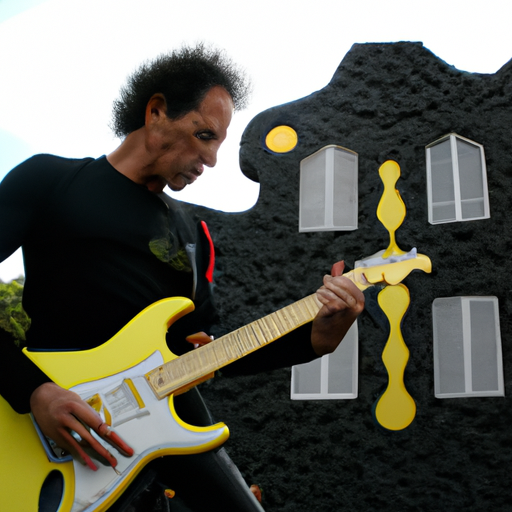

In [3]:
display.Image(
    get_image(
        "Kirk Hammet playing black ibanez RG guitar with Bob Sponge's house behind",
        size="512x512"
    ))

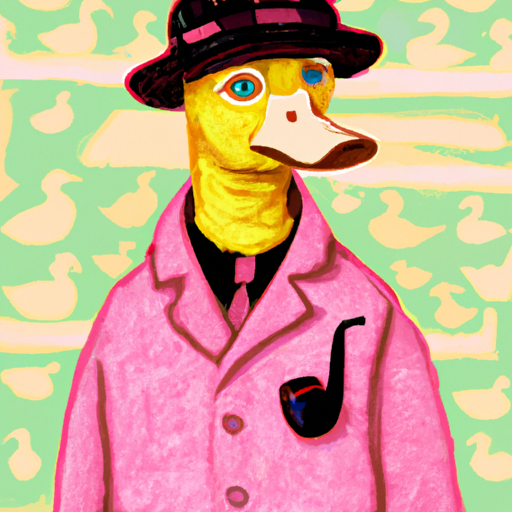

In [5]:
display.Image(
    get_image(
        "Lucas duck dressed as pink panther detective in the style of van gogh",
        size="512x512"
    ))